# Project Sprint 9 : OilyGiant Mining Prediction

## Introduction

In this project, geological exploration data from three prospective areas for a new OilyGiant well will be analyzed. The data provided is a sample of oil data from the three areas, along with the parameters of each well in the three areas.

From the geological exploration data, a predictive model is developed to predict the volume of oil reserves in new wells and select the oil wells with the highest total return.

### Goals

The objective of this project was to develop a predictive model capable of predicting suitable locations for drilling new wells that have the highest estimated value and total return.

### Steps

Geological data from the three exploration areas is stored in the filepaths `/geo_data_0.csv`, `/geo_data_1.csv`, and `/geo_data_2.csv`.

To train and develop the model, first the initial data exploration and initial data analysis are carried out, then data pre-processing and predictive model training and development are carried out. The last step is to calculate the risk and profit for each region. This project will consist of six main stages, namely:
1. Overview and Data Cleaning
2. Data Exploration
3. Dataset Preparation
4. Model Training and Profit Calculation Preparation
5. Calculation of Potential Profit
6. Calculation of Average Profit and Risk of Loss
7. General Conclusion

### Overview

**1. Introduction**
- Objective
- Stages
- Overview

**2. Data Overview and Data Cleansing**
- Initialization
- Load Dataset
- Prepare Up Dataset

**3. Data Exploration**

**4. Model Training and Profit Calculation Preparation**
- Correlation between Features and Variable Selection
- Model Training

**5. Calculation of Potential Profit and Risk of Loss**
- Calculation of Potential Profit for Each Region
- Calculation of Loss Risk and Average Profit

**6. General Conclusion**

## Data Overview and Data Cleansing

### Initialization

To perform data analysis and pre-processing as well as data exploration, libraries that can assist these activities are first loaded, namely:
1. `Pandas` Library
2. `Matplotlib` Library
3. `Seaborn` Library
4. `NumPy` Library

In [1]:
# Memuat library pandas
import pandas as pd

# Muat matplotlib library
from matplotlib import pyplot as plt

# Muat seaborn library
import seaborn as sns

# Muat library numpy
import numpy as np

### Load Dataset

Data awal geologi wilayah disimpan dalam filepath :
- `/geo_data_0.csv` yang akan dimuat dan disimpan dalam variabel `region_0`.
- `/geo_data_1.csv` yang akan dimuat dan disimpan dalam variabel `region_1`.
- `/geo_data_1.csv` yang akan dimuat dan disimpan dalam variabel `region_2`

In [2]:
# memuat datase dan menyimpannya dalam variabel region
region_0 = pd.read_csv('/datasets/geo_data_0.csv')
region_1 = pd.read_csv('/datasets/geo_data_1.csv')
region_2 = pd.read_csv('/datasets/geo_data_2.csv')

### prepare Dataset

Next, we will look at the sample data and general information about the three datasets.

**Region_0**

In [3]:
region_0.head(10)

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647
5,wX4Hy,0.969570,0.489775,-0.735383,64.741541
6,tL6pL,0.645075,0.530656,1.780266,49.055285
7,BYPU6,-0.400648,0.808337,-5.624670,72.943292
8,j9Oui,0.643105,-0.551583,2.372141,113.356160
9,OLuZU,2.173381,0.563698,9.441852,127.910945


In [4]:
region_0.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


In [5]:
region_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


**Region_1**

In [6]:
region_1.head(10)

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305
5,HHckp,-3.327590,-2.205276,3.003647,84.038886
6,h5Ujo,-11.142655,-10.133399,4.002382,110.992147
7,muH9x,4.234715,-0.001354,2.004588,53.906522
8,YiRkx,13.355129,-0.332068,4.998647,134.766305
9,jG6Gi,1.069227,-11.025667,4.997844,137.945408


In [7]:
region_1.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


In [8]:
region_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


**Region_2**

In [9]:
region_2.head(10)

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746
5,LzZXx,-0.758092,0.710691,2.585887,90.222465
6,WBHRv,-0.574891,0.317727,1.773745,45.641478
7,XO8fn,-1.906649,-2.458350,-0.177097,72.480640
8,ybmQ5,1.776292,-0.279356,3.004156,106.616832
9,OilcN,-1.214452,-0.439314,5.922514,52.954532


In [10]:
region_2.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838


In [11]:
region_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


***
**Findings**

Based on the sample data and general information in the dataset, the following information was obtained:
1. The data set consists of 100,000 observations and 5 columns.
2. The number of non-nulls in each column is equal to RangeIndex, which indicates there are no missing values in each column of the dataset `region_0`, `region_1` and `region_2`, will be re-confirmed by the **.isna()** method.
3. The `id` column contains the unique ID of the oil well, so this column will be dropped during training and model development.
4. Columns `f0`, `f1`, and `f2` are of the data type `float`, which based on the project description are three point features, so these columns will be used as the main features during model development.
5. The `product` column has the data type `float`, which based on the project description is the volume of oil reserves in the well (in thousands of barrels), so this column is the target / label. Since the target / label is numerical data, the model development will use regression modeling.
6. The initial dataset is quite good, but we will check whether there is explicit duplication of data and how much with the **.duplicated()** method.

**Missing Value Check**

In [12]:
region_0.isna().sum()

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

In [13]:
region_1.isna().sum()

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

In [14]:
region_2.isna().sum()

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

**Duplication Check**

In [15]:
region_0.duplicated().sum()

0

In [16]:
region_0.duplicated().sum()

0

In [17]:
region_0.duplicated().sum()

0

***
The quality of the initial dataset is very good; there are no `missing_values` in each column and no `duplicated` data in the three datasets. The next step is to explore the initial dataset.

## Data Exploration

### Region_0

Text(0, 0.5, 'Volume Cadangan Minyak')

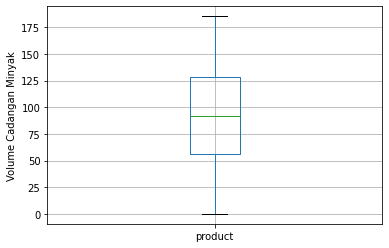

In [18]:
region_0.boxplot(column='product')

plt.ylabel('Volume Cadangan Minyak')

***
Based on the boxplot graph above, it is known that the median volume of oil reserves in `region_0` is about `80000` barrels of oil, which is quite a lot. Next, two other regions will be examined.

### Region_1

Text(0, 0.5, 'Volume Cadangan Minyak')

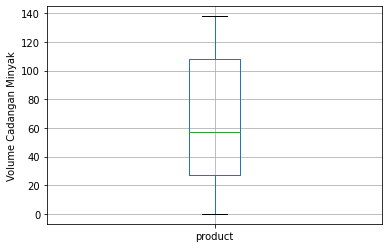

In [19]:
region_1.boxplot(column = 'product')

plt.ylabel('Volume Cadangan Minyak')

***
Based on the boxplot graph above, it can be seen that the median volume of spare oil in `region_1` is around `60000` barrels of oil, which is lower than `region_0`.

### Region_2

Text(0, 0.5, 'Volume Cadangan Minyak')

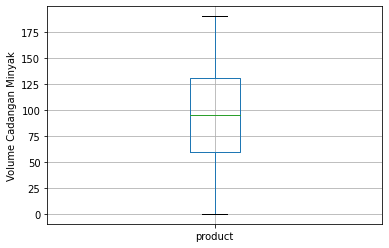

In [20]:
region_2.boxplot(column = 'product')

plt.ylabel('Volume Cadangan Minyak')

***
Based on the boxplot graph above, it can be seen that the median volume of oil reserves in `region_2` is close to `100,000` barrels of oil, a considerable amount compared to the other 2 regions.

***
**Conclusion**
Based on initial data exploration, it is known that `region_2` has the largest volume of oil reserves compared to the other 2 regions, so this region has the potential to have the largest estimated profit value but will be confirmed again at a later stage.

## Model Training and Profit Calculation

### Correlation between Features and Variable Selection

<AxesSubplot:>

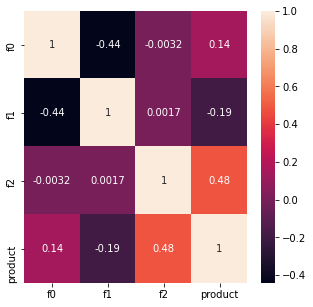

In [21]:
# menampilkan korelasi antar fitur dan target
from matplotlib.pyplot import figure
figure(figsize = (5,5))
sns.heatmap(region_0.corr(), annot=True)

<AxesSubplot:>

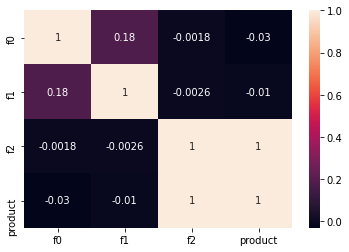

In [22]:
sns.heatmap(region_1.corr(), annot=True)

<AxesSubplot:>

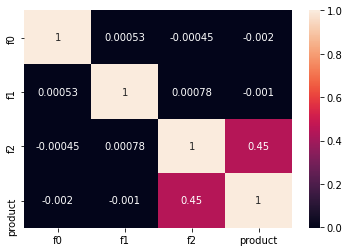

In [23]:
sns.heatmap(region_2.corr(), annot=True)

Based on the correlation value information from the three regions, it is known that the correlation value of the feature and the target is quite low, except the feature `f2` has a fairly high correlation score against the target `product` which is:
- `0.48` in region_0
- `1` in region_1
- `0.45` in region_2

so it can be temporarily concluded that the feature `f2` is the importance feature of the three datasets, but model training will still use the three features `f1`, `f2`, and `f3`. Column `id` which is the unique id of the oil well is not related to the target value `product`, so column `id` will be dropped from the dataset.

In [24]:
# menyeleksi fitur dan target
new_region_0 = region_0.drop('id', axis=1)
new_region_1 = region_1.drop('id', axis=1)
new_region_2 = region_2.drop('id', axis=1)

In [25]:
new_region_0

,f0,f1,f2,product
0,0.705745,-0.497823,1.221170,105.280062
1,1.334711,-0.340164,4.365080,73.037750
2,1.022732,0.151990,1.419926,85.265647
3,-0.032172,0.139033,2.978566,168.620776
4,1.988431,0.155413,4.751769,154.036647
...,...,...,...,...
99995,0.971957,0.370953,6.075346,110.744026
99996,1.392429,-0.382606,1.273912,122.346843
99997,1.029585,0.018787,-1.348308,64.375443
99998,0.998163,-0.528582,1.583869,74.040764


In [26]:
new_region_1

,f0,f1,f2,product
0,-15.001348,-8.276000,-0.005876,3.179103
1,14.272088,-3.475083,0.999183,26.953261
2,6.263187,-5.948386,5.001160,134.766305
3,-13.081196,-11.506057,4.999415,137.945408
4,12.702195,-8.147433,5.004363,134.766305
...,...,...,...,...
99995,9.535637,-6.878139,1.998296,53.906522
99996,-10.160631,-12.558096,5.005581,137.945408
99997,-7.378891,-3.084104,4.998651,137.945408
99998,0.665714,-6.152593,1.000146,30.132364


In [27]:
new_region_2

,f0,f1,f2,product
0,-1.146987,0.963328,-0.828965,27.758673
1,0.262778,0.269839,-2.530187,56.069697
2,0.194587,0.289035,-5.586433,62.871910
3,2.236060,-0.553760,0.930038,114.572842
4,-0.515993,1.716266,5.899011,149.600746
...,...,...,...,...
99995,-1.777037,1.125220,6.263374,172.327046
99996,-1.261523,-0.894828,2.524545,138.748846
99997,-1.199934,-2.957637,5.219411,157.080080
99998,-2.419896,2.417221,-5.548444,51.795253


### Model Training

To train the model and prepare the profit calculation, dataset preparation is first performed. To summarize the steps of training_set and validation_set preparation and model training, we will combine the features and targets of each region into one `region` variable.

In [28]:
# penggabungan dataset menjadi variabel region
region = [new_region_0, new_region_1, new_region_2]

*Splitting* the data will use the help of the **TrainSplitTest** function from the Scikit-learn library, with the following proportions of training and validation data:
1. Training_set - `client_train` **75%**
2. Test_set - `client_test` **25%**

After preparing the training_set and test_set, the next model training will be carried out with the help of the **Linear Regression** model from the sklearn.linear_model module.

In [29]:
# mengimport fungsi train split test dari modul model_slection
from sklearn.model_selection import train_test_split

# mengimport model Linear Regression
from sklearn.linear_model import LinearRegression

# mengimport metric rmse
from sklearn.metrics import mean_squared_error

In [30]:
# membuat instance random_state
state = np.random.RandomState(42)

data_target = []
data_prediksi = []

# melakukan splitting data dan pelatihan model
for i in range(len(region)):
    data = region[i]
    # menyiapkan feature dan target
    feature = data.drop('product', axis=1)
    target = data['product']
    
    # melakukan splitting dataset
    x_train, x_valid, y_train, y_valid = train_test_split(feature, target, test_size=0.25,
                                                          random_state=state)
   
    # pelatihan model dan prediksi
    model = LinearRegression()
    model.fit(x_train, y_train)
    prediksi_valid = model.predict(x_valid)
    prediksi_valid = pd.Series(prediksi_valid)
    
    # menyiapkan dataset untuk perhitunagn laba
    data_target.append(y_valid.reset_index(drop=True))
    data_prediksi.append(prediksi_valid)
    
    # menghitung rata-rata volume cadangan minyak dataset validation dan hasil prediksi
    mean_y_valid = y_valid.mean()
    mean_prediksi_valid = prediksi_valid.mean()
    
    # menghitung nilai rmse
    rmse = mean_squared_error(y_valid, prediksi_valid) ** 0.5
    
    print('Region ', i)
    print('Rata-rata Volume Cadangan Minyak Aktual ', round(mean_y_valid, 2))
    print('Rata-rata Volume Cadangan Minyak Prediksi ', round(mean_prediksi_valid, 2))
    print('RMSE : ', round(rmse, 2))
    print()

Region  0
Rata-rata Volume Cadangan Minyak Aktual  92.33
Rata-rata Volume Cadangan Minyak Prediksi  92.4
RMSE :  37.76

Region  1
Rata-rata Volume Cadangan Minyak Aktual  68.6
Rata-rata Volume Cadangan Minyak Prediksi  68.59
RMSE :  0.89

Region  2
Rata-rata Volume Cadangan Minyak Aktual  95.04
Rata-rata Volume Cadangan Minyak Prediksi  95.09
RMSE :  40.24



***
Based on the model prediction results, it is known that:
1. In `region_0`, the model can predict the average volume of oil reserves of `92.4` thousand barrels, which is almost similar to the average value of actual oil reserves of `92.33` thousand barrels, meaning that the model is quite capable of predicting the value of oil reserves quite accurately, but the **RMSE** value of the model is very large at `37.76` meaning that there is a potential for the prediction of oil reserves to miss by `37` thousand barrels.
2. In `region_1`, the model can predict the average volume of oil reserves of `68.59` thousand barrels, which is quite similar to the average value of actual oil reserves of `68.6` thousand barrels, meaning that the model is able to predict the value of oil reserves accurately, and the **RMSE** value of the model is very low at `0.89` meaning that the potential prediction of oil reserves misses by only `890` barrels.
3. In `region_2`, the model can predict the average volume of oil reserves of `95.04` thousand barrels, which is almost similar to the average value of actual oil reserves of `95.09` thousand barrels, meaning that the model is able to predict the value of oil reserves quite accurately, but the **RMSE** value of the model is very large at `40.24` meaning that there is a potential for the prediction of oil reserves to miss by `42` thousand barrels.

***
**Conclusion**

Based on the information above, it can be concluded that the model is able to predict well the volume of oil reserves in **region_1**, where the average volume of actual and predicted oil reserves is quite similar with a low **RMSE** value. Therefore, region_1 is a prospective area to be used as a new location for drilling new wells, but further analysis is needed regarding the estimation of profit and risk of loss in each region.

## Calculation of Potential Profit and Risk of Loss

To calculate profit and risk of loss, first prepare key variables according to the conditions in the project description, where:
- When exploring the area, a study of `500 spots` is conducted, selecting the best `200 spots` for profit calculation.
- The budget to develop 200 oil wells is `100 million USD`.
- One barrel of raw material generates revenue of 4.5 USD. Revenue from one unit of product is `4,500 dollars` (the volume of oil reserves in thousands of barrels).
- Retain only areas with a risk of loss of less than 2.5%. From the list of regions that meet the criteria, the region with the highest average profit will be selected.

In [31]:
# menyiapkan variabel kunci
sample_size = 500
best_point = 200
budget = 100000000
cost_per_point = budget / best_point
profit_per_product = 4500

### Calculation Potensial Profit of Each Region

To calculate the profit of each region, first create the `profit_prediction` function.

In [32]:
# membuat fungsi untuk perhitungan profit tiap wilayah
def profit_prediksi(data_prediksi, region):
    predict = data_prediksi[region]
    predict_200 = predict.sort_values(ascending=False)[:best_point]
    total_prediksi = predict_200.sum()
    
    budget_in_mil = round(budget / 1000000)
    total_income_in_mil = round(4500 * total_prediksi / 1000000)
    profit_in_mil = round(total_income_in_mil - budget_in_mil)
    
    print('Region ', region)
    print('Total biaya dalam juta USD = ', budget_in_mil)
    print('Total pendapatan dalam juta USD = ', total_income_in_mil)
    print('Profit dalam juta USD = ', profit_in_mil)
    print()

The next step applies the `profit_prediction` function to the `data_prediction` variable.

In [33]:
# menampilkan profit tiap wilayah
profit_prediksi(data_prediksi, 0)
profit_prediksi(data_prediksi, 1)
profit_prediksi(data_prediksi, 2)

Region  0
Total biaya dalam juta USD =  100
Total pendapatan dalam juta USD =  139
Profit dalam juta USD =  39

Region  1
Total biaya dalam juta USD =  100
Total pendapatan dalam juta USD =  125
Profit dalam juta USD =  25

Region  2
Total biaya dalam juta USD =  100
Total pendapatan dalam juta USD =  135
Profit dalam juta USD =  35



***
Based on the results of profit calculations on the model prediction results, it is known that:
1. In `region_0`, the total revenue earned is `139` million USD with a potential profit earned of `39` million USD.
2. In `region_1`, the amount of revenue earned is `125` million USD with the potential profit earned as much as `25` million USD.
3. In `region_2`, the total revenue earned is `135` million USD with a potential profit earned of `35` million USD.

**Conclusion**

Based on the information above, it can be tentatively concluded that `region_0` provides the most profit based on the predicted volume of oil reserves, which is **39 million USD** followed by `region_2` at **35 million USD** and `region_2` is the region with the lowest potential profit of only **25 million USD**. Therefore, `region_0` can be an option for drilling a new well because it has the highest potential profit compared to other regions.

### Calculation Risk Loss and Average Profit

To calculate the risk of loss, it will be done with the help of the **Bootstraping** technique with `1000 samples` with a confidence interval of **95%**.

In [34]:
# menyimpan variabel bootstrap
bootstrap_samples = 1000

# membuat fungsi bootstrap
def bootstrap(prediksi, area):
    predict_200 = prediksi.sort_values(ascending=False)[:best_point]
    total_product_200 = predict_200.sum()
    
    total_income = round(4500 * total_product_200)
    profit_est = total_income - budget
    
    return profit_est

In [38]:
state = np.random.RandomState(42)

# menghitung laba rata-rata dan resiko kerugian
for i in range(0,3):
    target = data_target[i]
    prediksi = data_prediksi[i]
    profit_est =[]
    
    for x in range(bootstrap_samples):
        sample_target = target.sample(sample_size, replace=True, random_state=state)
        sample_prediksi = prediksi[sample_target.index]
        profit_est.append(bootstrap(sample_prediksi, x))
    
    profit_est = pd.Series(profit_est)
    profit_est_mean = round(profit_est.mean())
    selang_kepercayaan = round(profit_est.quantile(0.025)), round(profit_est.quantile(0.975))
    risk_mean = (profit_est < 0).mean()
    percent_risk = round(risk_mean * 100, 2)
    
    print('Region ', i)
    print('Rata-rata profit = ', profit_est_mean)
    print('Selang Kepercayaan 95% = ', selang_kepercayaan)
    print('Resiko kerugian = ', percent_risk, '%')
    print()

Region  0
Rata-rata profit =  3314833
Selang Kepercayaan 95% =  (1054250, 5552615)
Resiko kerugian =  0.3 %

Region  1
Rata-rata profit =  4301988
Selang Kepercayaan 95% =  (430880, 8018150)
Resiko kerugian =  1.9 %

Region  2
Rata-rata profit =  3030545
Selang Kepercayaan 95% =  (1164670, 5171933)
Resiko kerugian =  0.0 %



***
Based on the calculation of average profit and risk of loss, the following information is obtained:
1. In `region_0`, the average profit is `3,314,833 USD` with a fairly low loss risk of `0.3%` where the confidence interval range is `1,054,250` to `5,552,615`. 
2. In `region_1` an average profit of `4,301,988 USD` is obtained with a fairly low risk of loss of `2.0%` where the confidence interval range is `430,880` to `8,018,150`.
3. In `region_2` the average profit is `3,030,545 USD` with a fairly low risk of loss of `0.1%` where the confidence interval range is `1,164,670` to `5,171,933`.

***
**Conclusion**

Based on the information above, it is known that the lowest risk of loss is in `region_2` which is **0.0%**, followed by `region_0` which is **0.3%** and `region_1` which is the largest at **1.9%**, but the average profit of `region_1` is the highest at **4,253,895 USD**, besides that, the range of confidence interval is also quite large, so there is a possibility that the estimated profit obtained is not always high. Therefore, `region_2` is the most prospective region for drilling new wells, where in addition to the low risk of loss of **0.0%**, the potential average profit earned is quite large at **3,030,545 USD** with more certainty. 

## General Conclusion

The dataset obtained is the result of geological exploration in 3 different regions, where each data set has 100000 rows (observations) and 5 columns. Based on initialization and exploration of the initial data, the following information is obtained:
1. The quality of the datasets from the three regions is good enough that there are no missing values or duplications.
2. Columns `f0`, `f1`, and `f2` are of the data type `float` which based on the project description are three point features, so these columns will be used as the main features during model development, while column `id` which contains the unique ID of the oil well, will be dropped from the dataset.
3. Based on preliminary data exploration, it is known that `region_2` has the largest volume of oil reserves compared to other regions, so this region has the potential to have the largest estimated profit value but will be confirmed again at a later stage.

From the three datasets, data *splitting* is then carried out with the help of the **TrainSplitTest** function to get the `training_set`-75% and `validation_set`-25% datasets. Furthermore, the model was trained and predicted the volume of oil reserves in each region with the **Linear Regression** model, and the results showed that the model was able to predict well the volume of oil reserves in **region_1**, where the average actual and predicted oil reserve volumes were quite similar with a low **RMSE** value.

Based on the calculation of potential profit, average profit, and risk of loss, it is found that `region_0` provides the most profit based on the predicted volume of oil reserves of **39 million USD**, where the risk of loss is also quite low at **0.3%** with an average profit of **3,314,833 USD**, but based on the risk of loss, `region_2` has the lowest risk of loss of **0.0%** with a narrow range of confidence intervals indicating a more certain potential profit.

**Rocemendation**

AIf OilyGiant is focused on earning a sizable average profit with low risk of loss, then `region_0` is the best choice of region, but if it wants the lowest possible risk with more certain profit potential, then `region_2` is the best choice. `Region_1` would be the best choice if the company focuses on earning the highest average profit as long as the risk of loss is below `2.5%`.